Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# ID Duplicaes

In [4]:
df.id.nunique()

21420

In [5]:
df[df.duplicated(subset=['id'], keep='last')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20164,7853400250,6/4/2014,610000.0,4,3.50,2910,5260,2.0,0.0,0.0,...,9,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20596,2724049222,8/2/2014,163800.0,2,2.50,1000,1092,2.0,NaN,0.0,...,7,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20653,8564860270,7/8/2014,449990.0,4,2.50,2680,5539,2.0,0.0,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [6]:
df.drop_duplicates(subset='id', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  float64
 9   view           21357 non-null  float64
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17616 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

1. .describe() to see distribution numbers 
2. displot to see distribution plotted, visualize skew
3. a dataframe to be added to the final data frame of cleaned columns,  

# Date

In [7]:
df.date.value_counts()

6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
1/17/2015       1
11/30/2014      1
1/31/2015       1
11/2/2014       1
5/15/2015       1
Name: date, Length: 372, dtype: int64

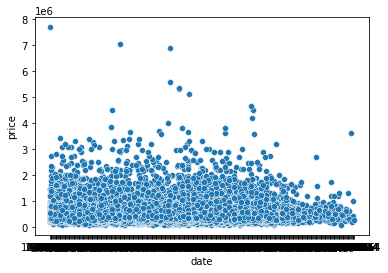

In [8]:
sns.scatterplot(data=df, x='date', y='price');

In [9]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [10]:
df.drop(columns=['date'], inplace=True, axis=1)

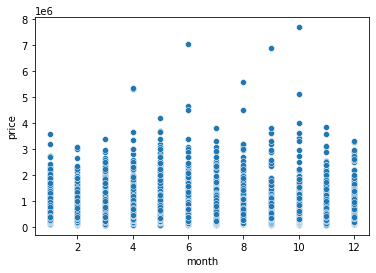

In [11]:
sns.scatterplot(data=df, x='month', y='price');

# Price

In [12]:
df.price.describe()

count    2.142000e+04
mean     5.407393e+05
std      3.679311e+05
min      7.800000e+04
25%      3.225000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

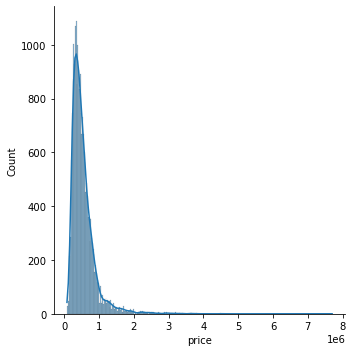

In [13]:
sns.displot(df, x='price', kde=True);

# Sqft_living

In [14]:
df.sqft_living.value_counts()

1300    136
1440    133
1400    132
1660    128
1800    128
       ... 
6900      1
6980      1
3078      1
7220      1
2031      1
Name: sqft_living, Length: 1034, dtype: int64

In [15]:
df.sqft_living.isna().sum()

0

In [16]:
df.sqft_living.describe()

count    21420.000000
mean      2083.132633
std        918.808412
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

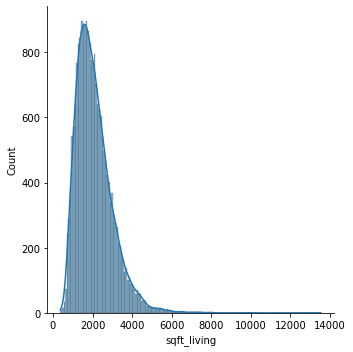

In [17]:
sns.displot(df, x='sqft_living', kde=True);

# Waterfront

In [18]:
df.waterfront.isna().sum()

2353

In [19]:
df['waterfront'] = df.waterfront.fillna(value=0)

In [20]:
df.waterfront.value_counts()

0.0    21274
1.0      146
Name: waterfront, dtype: int64

In [21]:
df['waterfront'] =df['waterfront'].astype(int)

In [22]:
df.waterfront.isna().value_counts()

False    21420
Name: waterfront, dtype: int64

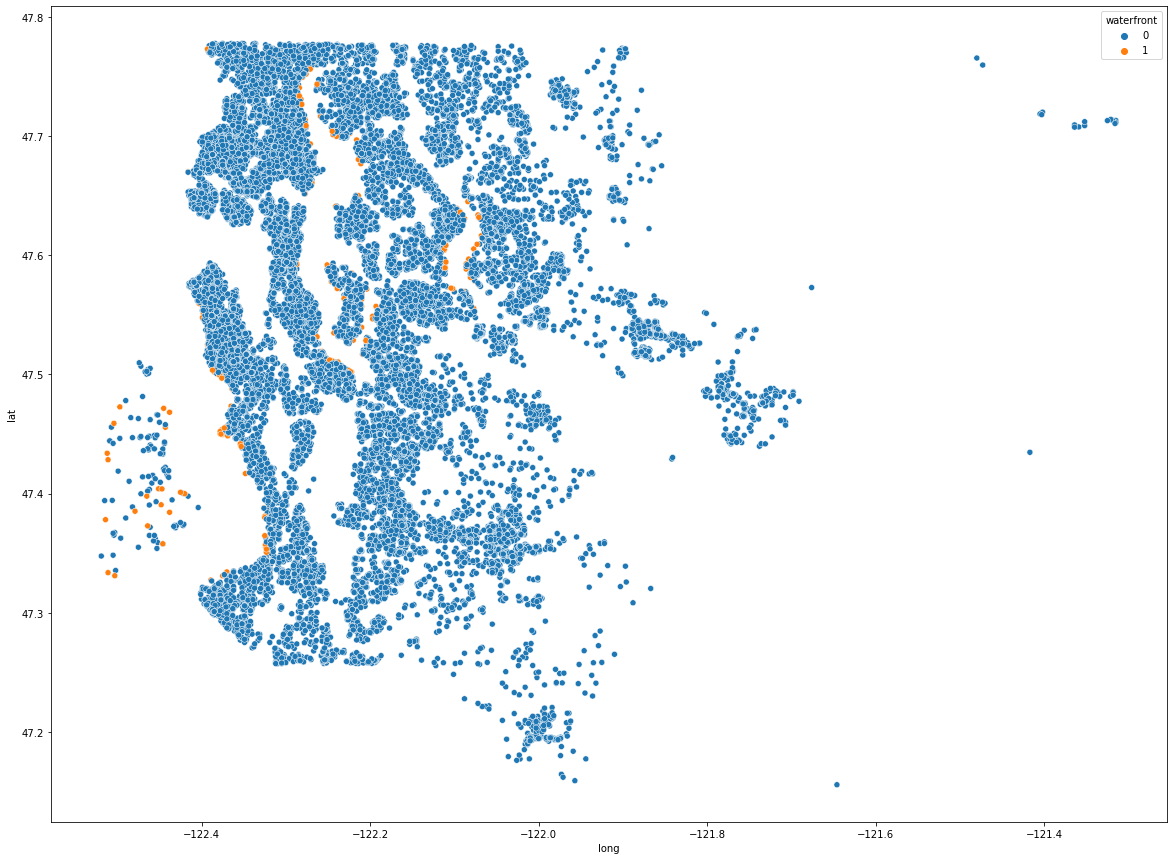

In [23]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='long', y='lat', data=df, hue='waterfront');

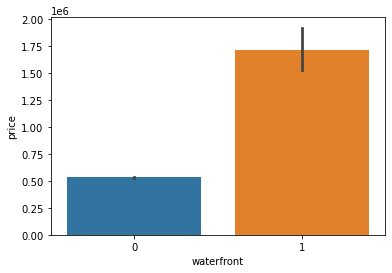

In [24]:
sns.barplot(x = "waterfront", y = "price", data = df);

# Sqft_basement

In [25]:
df.sqft_basement.value_counts()

0.0       12717
?           452
600.0       216
500.0       206
700.0       205
          ...  
276.0         1
1852.0        1
2850.0        1
2400.0        1
283.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [26]:
df['sqft_basement'] = df['sqft_basement'].replace('?', '0')
df.sqft_basement.sort_values(ascending=True)

1662         0
8898         0
12933        0
18984        0
12161        0
         ...  
3162     990.0
13596    990.0
184      990.0
2795     990.0
8584     990.0
Name: sqft_basement, Length: 21420, dtype: object

In [27]:
df['sqft_basement']= df.sqft_basement.astype(float)

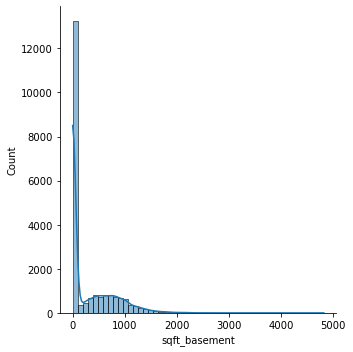

In [28]:
sns.displot(df, x='sqft_basement',bins=50, kde=True);

# Sqft_above

In [29]:
df.sqft_above.value_counts()

1300    210
1010    204
1200    203
1220    186
1140    183
       ... 
2198      1
6420      1
2406      1
2502      1
2031      1
Name: sqft_above, Length: 942, dtype: int64

In [30]:
df.sqft_above.isna().sum()

0

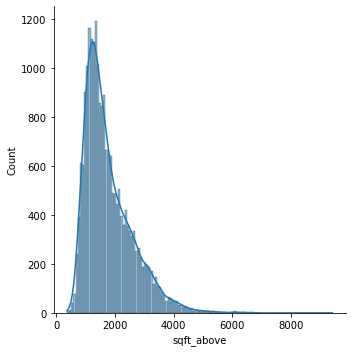

In [31]:
sns.displot(df, x='sqft_above', kde=True);

In [32]:
#df.drop(columns=['sqft_above'], inplace=True, axis=1)

# Yr_built

In [33]:
df.yr_built.value_counts()

2014    559
2006    453
2005    450
2004    429
2003    420
       ... 
1933     29
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [34]:
df.yr_built.isna().sum()

0

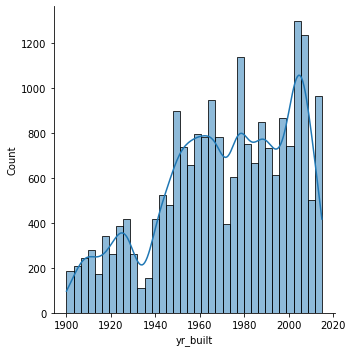

In [35]:
sns.displot(df, x='yr_built', kde=True);

# Yr_renovated 

In [36]:
df.yr_renovated.value_counts()

0.0       16876
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [37]:
df.yr_renovated.isna().sum()

3804

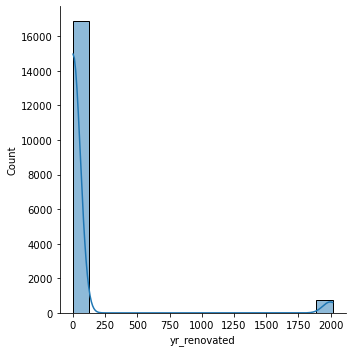

In [38]:
sns.displot(df, x='yr_renovated', kde=True);

Too many Na values. 

In [39]:
df.drop(columns=['yr_renovated'], inplace=True, axis=1)

# Sqft_living15

In [40]:
df.sqft_living15.value_counts()

1540    193
1440    190
1560    190
1500    178
1460    168
       ... 
1399      1
1303      1
3078      1
2822      1
2015      1
Name: sqft_living15, Length: 777, dtype: int64

In [41]:
df.sqft_living15.isna().sum()

0

In [42]:
df.sqft_living15.describe()

count    21420.000000
mean      1988.384080
std        685.537057
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2370.000000
max       6210.000000
Name: sqft_living15, dtype: float64

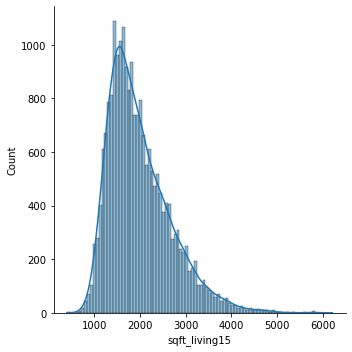

In [43]:
sns.displot(x='sqft_living15', data=df, kde=True);

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  int32  
 8   view           21357 non-null  float64
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  float64
 13  yr_built       21420 non-null  int64  
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  int64  
 18  sqft_l

# Sqft_lot15

In [45]:
df.sqft_lot15.value_counts()

5000     425
4000     354
6000     285
7200     209
4800     144
        ... 
11923      1
3719       1
7813       1
5764       1
2047       1
Name: sqft_lot15, Length: 8682, dtype: int64

In [46]:
df.sqft_living15.isna().sum()

0

In [47]:
df.sqft_lot15.describe()

count     21420.000000
mean      12775.718161
std       27345.621867
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10086.250000
max      871200.000000
Name: sqft_lot15, dtype: float64

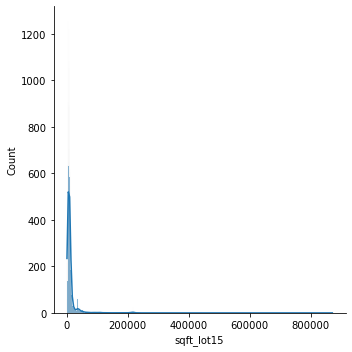

In [48]:
sns.displot(x='sqft_lot15', data=df, kde=True);

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  int32  
 8   view           21357 non-null  float64
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  float64
 13  yr_built       21420 non-null  int64  
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  int64  
 18  sqft_l

In [50]:
#df.drop(columns=['sqft_lot15'], inplace=True, axis=1)

In [51]:
#dropping view coloumns.
df.drop(columns=['view'], axis=1, inplace=True)

# Clean df

In [52]:
df.to_csv("clean_df.csv")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  int32  
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  int64  
 11  sqft_basement  21420 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  zipcode        21420 non-null  int64  
 14  lat            21420 non-null  float64
 15  long           21420 non-null  float64
 16  sqft_living15  21420 non-null  int64  
 17  sqft_lot15     21420 non-null  int64  
 18  month 

In [54]:
df.shape

(21420, 19)